
Quick Looks at the Data - TXS 0506+056
==========================
Let's look at "famous" source in a more complicated region: TXS 0506+056.

These are quick ways you can have a look at the data you have. These give you some insight, but they are not statistically rigorous (rigor needs the Likelihood method).  The data you are about to see have not been corrected for things like livetime, exposure, background, random acts of statistics etc.  but go for it…

**Goal:**  *Make simple views of the data, establish individual projects*

In [1]:
#from IPython.display import Image,HTML

In [2]:
from astropy.io import fits as pyfits

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import gt_apps

In [5]:
from gt_apps import filter,maketime,counts_map

### Download data from the LAT Data Server

You'll need to create a directory to store the data we are going to use, and then download that data. 

In [6]:
# Make the data directory, if it doesn't already exist.
!mkdir ../0506data/

mkdir: cannot create directory ‘../0506data/’: File exists


In [7]:
# Download your data and put it in the directory you just made. You will have to do this step by hand.

In [8]:
# Put your data in the the directory you just made. 
!ls ../0506data/*PH*fits > ../0506data/events.txt
!cat ../0506data/events.txt

../0506data/L210603112643E7BB996317_PH00.fits
../0506data/L210603112643E7BB996317_PH01.fits
../0506data/L210603112643E7BB996317_PH02.fits


In [9]:
# I like to rename the spacecraft file to something like "SC.fits" to make it easier to work with.
!mv ../0506data/*SC*.fits ../0506data/SC.fits

mv: ‘../0506data/SC.fits’ and ‘../0506data/SC.fits’ are the same file


### Make a counts map
This will make an image 200x200 pixels, where eachpixel is 0.05 deg. on a side. Image will be 10 deg. on a side.

In [10]:
filter['infile'] = '@../0506data/events.txt'
filter['outfile'] = '../0506data/0506_filt.fits'
filter['ra'] = 77.3582
filter['dec'] = 5.69315
filter['rad'] = 30.0
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100
filter['emax'] = 300000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3
filter.run()

time -p gtselect infile=@../0506data/events.txt outfile=../0506data/0506_filt.fits ra=77.3582 dec=5.69315 rad=30.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 15.18
user 14.55
sys 0.60


In [11]:
maketime['evfile'] = '../0506data/0506_filt.fits'
maketime['outfile'] = '../0506data/0506_filt_gti.fits'
maketime['scfile'] = '../0506data/SC.fits'
maketime['filter'] = 'DATA_QUAL>0 && LAT_CONFIG==1'
maketime['apply_filter'] = 'yes'
maketime['roicut'] = 'no'
maketime.run()

time -p gtmktime scfile=../0506data/SC.fits sctable="SC_DATA" filter="DATA_QUAL>0 && LAT_CONFIG==1" roicut=no evfile=../0506data/0506_filt.fits evtable="EVENTS" outfile="../0506data/0506_filt_gti.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 3.15
user 2.52
sys 0.62


In [12]:
from gt_apps import counts_map
counts_map['evfile'] = '../0506data/0506_filt_gti.fits'
counts_map['scfile'] = 'NONE'
counts_map['outfile'] = '../0506data/0506_cmap2.fits'
counts_map['algorithm'] = 'CMAP'
counts_map['xref'] = 77.3582
counts_map['yref'] = 5.69315
counts_map['coordsys'] = 'CEL'
counts_map['nxpix'] = 200
counts_map['nypix'] = 200
counts_map['binsz'] = 0.05
counts_map['axisrot'] = 0.0
counts_map['proj'] = 'AIT'
counts_map.run()

time -p gtbin evfile=../0506data/0506_filt_gti.fits scfile=NONE outfile=../0506data/0506_cmap2.fits algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 enumbins=0 denergy=0.0 ebinfile=NONE tbinalg="LIN" tstart=410227203.0 tstop=441763203.0 dtime=172800.0 tbinfile=NONE snratio=0.0 lcemin=0.0 lcemax=0.0 nxpix=200 nypix=200 binsz=0.05 coordsys="CEL" xref=77.3582 yref=5.69315 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 1.38
user 1.30
sys 0.07


In [13]:
cmap = pyfits.open('../0506data/0506_cmap2.fits')

In [14]:
cmap.info()

Filename: ../0506data/0506_cmap2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     132   (200, 200)   int32   
  1  GTI           1 BinTableHDU     48   5644R x 2C   [D, D]   


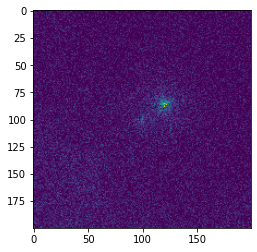

In [15]:
imshow(cmap[0].data)

In [16]:
!ds9 ../0506data/0506_cmap2.fits

## Make some lightcurves.

### One lightcurve for TXS 0506+056

In [17]:
filter['infile'] = '../0506data/0506_filt_gti.fits'
filter['outfile'] = '../0506data/0506_1deg.fits'
filter['ra'] = 77.3582
filter['dec'] = 5.69315
filter['rad'] = 1.0
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100
filter['emax'] = 300000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3
filter.run()

time -p gtselect infile=../0506data/0506_filt_gti.fits outfile=../0506data/0506_1deg.fits ra=77.3582 dec=5.69315 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 2.24
user 2.18
sys 0.05


### And another for PKS 0502+049

In [18]:
filter['infile'] = '../0506data/0506_filt_gti.fits'
filter['outfile'] = '../0506data/0502_1deg.fits'
filter['ra'] = 76.346603
filter['dec'] = 4.995201
filter['rad'] = 1.0
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100
filter['emax'] = 300000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3
filter.run()

time -p gtselect infile=../0506data/0506_filt_gti.fits outfile=../0506data/0502_1deg.fits ra=76.346603 dec=4.995201 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 2.26
user 2.18
sys 0.07


In [19]:
lc_gtselect = pyfits.open('../0506data/0506_1deg.fits')

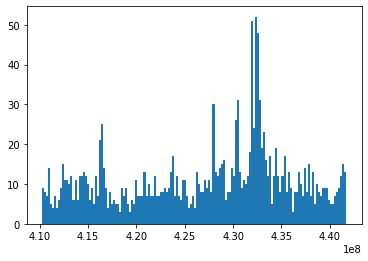

In [20]:
# This is the lightcurve for TXS 0506+056
n, bins, patches = hist(lc_gtselect[1].data.field('TIME'), bins=150)

In [21]:
lc2_gtselect = pyfits.open('../0506data/0502_1deg.fits')

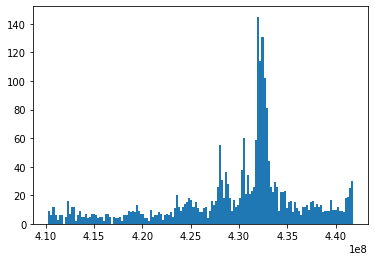

In [22]:
# This is the ligthcurve for PKS 0502+049
n, bins, patches = hist(lc2_gtselect[1].data.field('TIME'), bins=150)

Hmm, these lightcurves look quite similar! It seems that the signal of the field source ~1 deg. away (PKS 0502+049) is driving the bulk of the variability "observed" for TXS 0506+056. This is why you should do a Likelihood analysis!